In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"F:\internship\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [5]:
df["Species"]=l.fit_transform(df["Species"])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
df["Species"].unique()

array([0, 1, 2])

In [8]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [33]:
df.shape

(150, 6)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

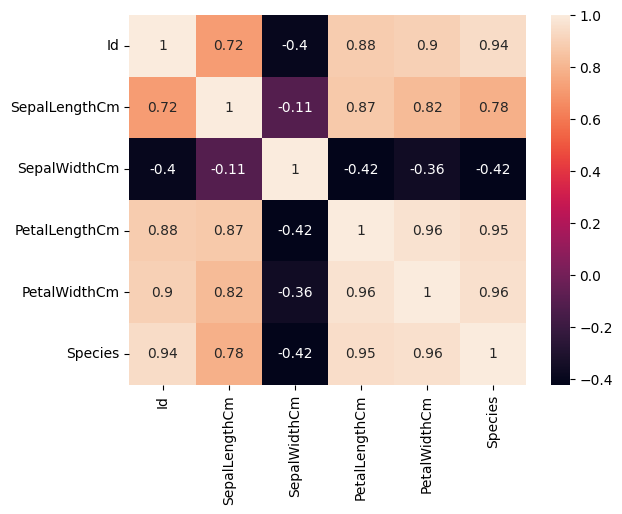

In [36]:
import seaborn as sns
r=df.corr()
sns.heatmap(r,annot=True)

Text(0.5, 1.0, 'Petal vs Sepal Length')

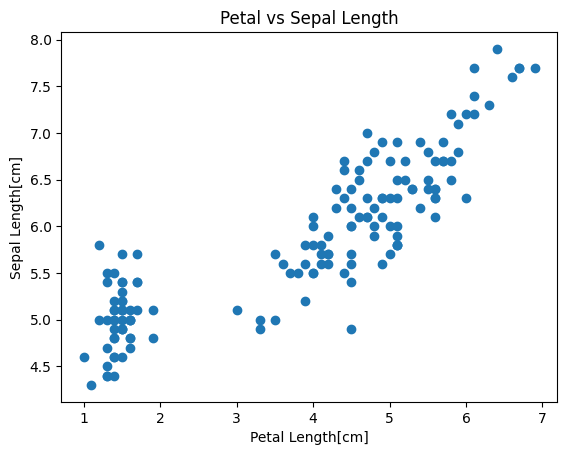

In [39]:
import matplotlib.pyplot as plt
plt.scatter(df["PetalLengthCm"],df["SepalLengthCm"])
plt.xlabel("Petal Length[cm]")
plt.ylabel("Sepal Length[cm]")
plt.title("Petal vs Sepal Length")

Text(0.5, 1.0, 'Petal vs Sepal Width')

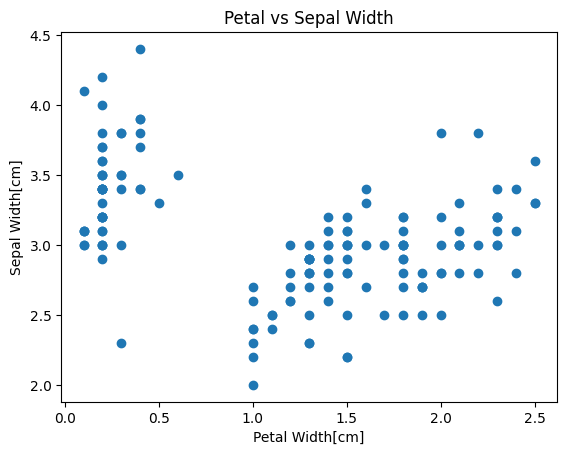

In [40]:
plt.scatter(df["PetalWidthCm"],df["SepalWidthCm"])
plt.xlabel("Petal Width[cm]")
plt.ylabel("Sepal Width[cm]")
plt.title("Petal vs Sepal Width")

In [42]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='Species'>

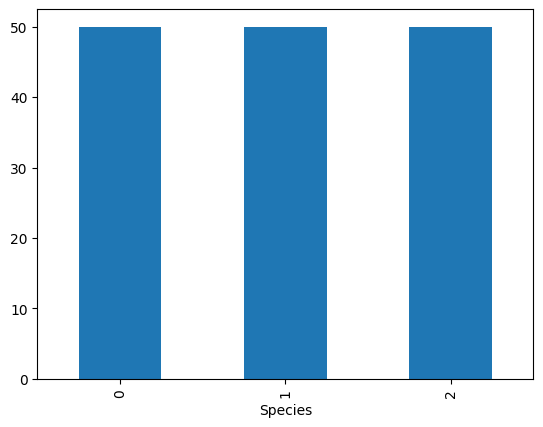

In [43]:
df['Species'].value_counts().plot(kind="bar")

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [46]:
x=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df.Species.values

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
import numpy as np

In [62]:
mod=RandomForestClassifier()
mod.fit(x_train,y_train)


RandomForestClassifier()

In [63]:
y_pred=mod.predict(x_test)

In [65]:
res=classification_report(y_test,y_pred)
res

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00        11\n           2       1.00      1.00      1.00        12\n\n    accuracy                           1.00        38\n   macro avg       1.00      1.00      1.00        38\nweighted avg       1.00      1.00      1.00        38\n'

In [66]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [69]:
MLmodels = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree" : DecisionTreeClassifier()}

def result(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [70]:
ScoringModels = result(models=MLmodels,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
ScoringModels

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Decision Tree': 1.0}